<h1 style="
font-family:'Segoe UI', sans-serif;
font-size:48px;
text-align:center;
font-weight:800;
letter-spacing:1.5px;
background:linear-gradient(90deg,#2563eb,#06b6d4);
-webkit-background-clip:text;
-webkit-text-fill-color:transparent;">
Statistical Evaluation of Factors Influencing Furniture Prices
</h1>


<div style="
background:#e0f2fe;
color:#075985;
font-family:'Segoe UI';
padding:14px;
border-radius:10px;
font-size:22px;
font-weight:700;">
▶ Import Libraries, Statistical Methods, Algorithms, Metrics
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats

<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> LOAD THE DATASET
</h1

In [2]:
df=pd.read_csv(r"C:\Users\Shemeem\Downloads\Furniture.csv")

In [3]:
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [5]:
df.shape

(2500, 15)

In [6]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [7]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

price
[218.54305348 477.82143788 379.39727382 ... 439.50971553 491.33270461
 233.41289386]
2500
cost
[181.61093156 385.033827   276.73676516 ... 277.39090273 405.98730596
 172.47461123]
2500
sales
[40  7 32 48 19  6 20 27 43 37  5 11 15  3 23  9 29 17 26 21  8 38 42 24
 35 14 10 12 44 46 34 41 31  1 39  4 13 22 18  2 36 30 33 28 25 47 49 16
 45]
49
profit_margin
[16.89924312 19.41888821 27.05884194 ... 36.88628648 17.37018477
 26.10750487]
2500
inventory
[105 192  59  45  35 185 165  10  11 169  38 198 138  51  30  32 140 145
 168  57 183 151 127  54   9 187 129  14   2  42 158 197  66  55  62 108
 115  91 137  46  56  49  70 142  81 104  87   1 103  83 153  93  41 132
  64  33 119   0 147  60 148  67 126 139  21 128  29 125  96  23  13 196
  94 181  25 193  79  74 178 162  28 164  80  53 155 170 130 186 141 174
 159  31 114 121 157  90 136 109  48  72  52  99 123 167  44 195 149 166
 133  47   6  15  36 124 191  61  71 188 160  65  19 106 131  76  88 175
  27  34  84 110 184  68  63  

In [8]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> EDA
</h1

### Bar Plot

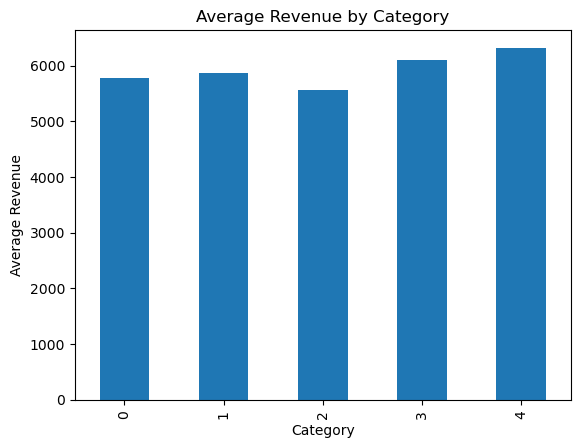

In [51]:
plt.figure()
df.groupby('category')['revenue'].mean().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Category')
plt.show()


### Scatter Plot

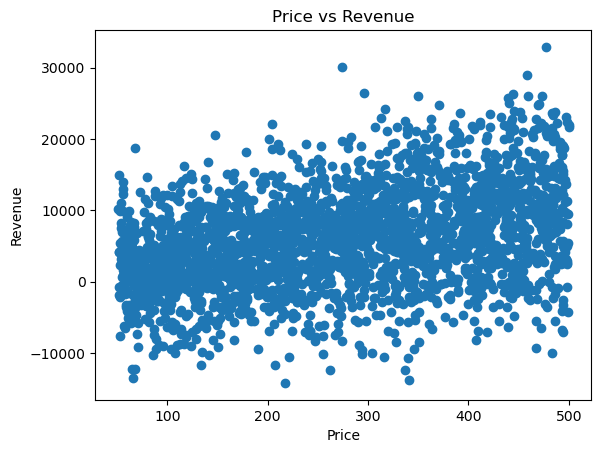

In [9]:
plt.figure()
plt.scatter(df['price'], df['revenue'])
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Price vs Revenue')
plt.show()


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Z-TEST
</h1

### H₀ (Null Hypothesis):
The mean revenue of Online stores is equal to the mean revenue of Retail stores

### H₁ (Alternative Hypothesis):
The mean revenue of Online stores is not equal to the mean revenue of Retail store.

In [10]:
store_type1= df[df['store_type'] =="Online"]['revenue']
store_type2 = df[df['store_type'] =="Retail" ]['revenue']

In [11]:
z_stat, p_value = ztest(store_type1,store_type2,value=0)

In [12]:
print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: -0.853577367463371
P-value: 0.3933392031398839


In [13]:

alpha = 0.05

if p_value < alpha:
    print("Reject the Null Hypothesis ")
else:
    print("Fail to Reject the Null Hypothesis")

Fail to Reject the Null Hypothesis


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Shapiro–Wilk Normality Test
</h1

### H₀ (Null Hypothesis):

The revenue data is normally distributed.

𝐻
0
:
 Revenue follows a normal distribution
### H₁ (Alternative Hypothesis):

The revenue data is not normally distributed.

𝐻
1
:
 Revenue does not follow a normal distribution


In [54]:
from scipy.stats import shapiro

stat, p = shapiro(df['revenue'])
print("Statistic:", stat)
print("p-value:", p)


Statistic: 0.9953680956164236
p-value: 5.093601634301119e-07


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> T-TEST
</h1

### H₀ (Null Hypothesis):
The mean revenue of Rural locations is equal to the mean revenue of Urban locations.
### H₁ (Alternative Hypothesis):
The mean revenue of Rural locations is not equal to the mean revenue of Urban locations.

In [14]:
Location_1 = df[df['location'] == 'Rural']['revenue']
Location_2 = df[df['location'] == 'Urban']['revenue'] 

In [15]:
t_stat, p_value = ttest_ind(Location_1, Location_2, equal_var=False)

In [16]:
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.8267496490516949
P-value: 0.40849728039225275


In [17]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Fail to reject the null hypothesis: No significant difference.


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> Chi2
</h1

In [18]:
categorical_cols=["category","material","color","location","season","store_type","brand"]

In [19]:
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['brand'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    print(contingency_table)
    print( expected)
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and revenue.")
    else:
        print(f"There is no statistically significant association between {col} and revenue.")
    print("\n")

Chi2 Statistic: 10.44843548481269
P-value: 0.576682153393361
brand     BrandA  BrandB  BrandC  BrandD
category                                
Bed          119     116     128     118
Chair        116     111     141     129
Desk         125     128     133     115
Sofa         138     107     120     123
Table        152     126     122     133
[[125.06   113.1312 123.9056 118.9032]
 [129.22   116.8944 128.0272 122.8584]
 [130.26   117.8352 129.0576 123.8472]
 [126.88   114.7776 125.7088 120.6336]
 [138.58   125.3616 137.3008 131.7576]]
There is no statistically significant association between category and revenue.


Chi2 Statistic: 11.332497130450186
P-value: 0.5006589377201998
brand     BrandA  BrandB  BrandC  BrandD
material                                
Fabric       127     100     100     124
Glass        123     115     142     120
Metal        145     120     135     129
Plastic      132     125     125     110
Wood         123     128     142     135
[[117.26   106.0752 116.

<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> ANOVA
</h1

In [20]:
annova_data=df[["color","revenue"]]

In [21]:
annova_data

,color,revenue
0,Red,3949.165238
1,Blue,-3521.002258
2,Black,14285.560219
3,Green,12261.073703
4,Brown,-4588.255733
...,...,...
2495,White,-3351.943350
2496,Red,-445.621346
2497,Red,25809.096038
2498,Black,18963.246944


In [22]:
groups = annova_data.groupby('color')['revenue'].apply(list)

In [23]:
groups

color
Black    [14285.560218531968, 8946.637741278517, -1415....
Blue     [-3521.002257553382, -1043.2643163100413, 1003...
Brown    [-4588.255733260207, 9136.301617300403, 8882.5...
Green    [12261.07370297016, 4128.412805176245, 1201.73...
Red      [3949.165238422572, -9150.835909226422, 286.64...
White    [9516.966398265264, 1782.7705141267547, 3196.3...
Name: revenue, dtype: object

In [24]:
f_statistic, p_value = stats.f_oneway(*groups)

In [25]:
# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 1.8348648145576496
P-value: 0.10273676577404063


In [26]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")

There are no significant differences between the groups.


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> ENCODING
</h1

In [27]:
le = LabelEncoder()

In [28]:
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])


<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> MODEL BUILDING
</h1

In [29]:
x=df.drop('revenue',axis=1)

In [30]:
x

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,3,4,0,1,0,0
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,1,1,0,2,0,3
2,379.397274,276.736765,32,27.058842,59,21.948130,2,4,2,0,1,0,0,3
3,319.396318,281.841334,48,11.758114,45,11.009944,2,4,1,3,0,2,1,3
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,1,2,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,1,2,5,1,0,1,1
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,0,1,4,2,2,1,3
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,2,0,4,0,2,0,3
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,2,2,0,1,0,1,0


In [31]:
y=df["revenue"]
y

0        3949.165238
1       -3521.002258
2       14285.560219
3       12261.073703
4       -4588.255733
            ...     
2495    -3351.943350
2496     -445.621346
2497    25809.096038
2498    18963.246944
2499    -1692.339628
Name: revenue, Length: 2500, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()

In [34]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test_scaled)

<h1 style="background-color:black; color:yellow; text-align:center;padding: 12px; boarder-radius: 15px; font-wight: bold"> F-TEST
</h1

In [37]:
y_pred = np.where(y_pred >= 0.5, 1, 0)


In [38]:
n=len(y_test)
p=x_train.shape[1]

In [39]:
RSS=np.sum((y_test-y_pred)**2)
print(RSS)

42917662326.85736


In [40]:
TSS=np.sum((y_test-np.mean(y_test))**2)
print(TSS)

26237529933.612537


In [41]:
ESS=TSS-RSS
print(ESS)

-16680132393.244823


In [42]:
MSR = ESS / p
print(MSR)

-1191438028.088916


In [43]:
MSE=RSS/(n-p-1)
MSE

np.float64(88490025.41620074)

In [44]:
f_stati=MSR/MSE
f_stati

np.float64(-13.464094088403186)

In [45]:
from scipy import stats

In [46]:
p_value=1-stats.f.cdf(f_stati,p,n-p-1)
p_value

np.float64(1.0)

In [47]:
print('f-statistic',f_stati)
print('p_value',p_value)

f-statistic -13.464094088403186
p_value 1.0


In [48]:
if p_value < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is not significant at the 5% significance level.


In [49]:
MSE

np.float64(88490025.41620074)

### 📊 **Conclusion**

This study analyzed a comprehensive furniture dataset comprising numerical variables such as *price, cost, sales, profit_margin, inventory, discount_percentage, delivery_days,* and *revenue*, along with categorical factors including *category, material, color, location, season, store_type,* and *brand*. The analysis highlights that revenue is influenced not only by pricing and cost structures but also by operational and market-related factors such as discount strategies, inventory levels, delivery efficiency, and store type. Categorical attributes like location, seasonality, and brand preference further contribute to variations in sales performance and profitability. Overall, the findings emphasize the importance of a data-driven approach in understanding revenue patterns, enabling businesses to optimize pricing, improve supply chain efficiency, and tailor marketing strategies to different customer segments for enhanced financial performance.
